<a href="https://colab.research.google.com/github/ShesterG/Twitter-Sentiment-Analysis/blob/master/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Twitter Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Imports & Constants

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [5]:
DATA_FILE_PATH = '/content/drive/MyDrive/NLPGh/'
DATA_FILE_NAME = 'NALS1Original.csv'
SAVE_FILE = True


# Read Data File

In [8]:
df = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME, encoding = "ISO-8859-1")

# Initial Review of Data

In [9]:
df.head()

,tweet,location,pretweet,Sentiment
0,Pls add us some momo to make data 0246964913 ...,NaN,pl add some momo make data 0246964913,0.0
1,@McVan_1 @AnnanPerry @blac4rina We will descen...,Ghana,will descend soon,0.0
2,*Forgery allegations by EC is not enough to di...,NaN,forgeri alleg not enough disqualifi the five p...,0.0
3,@NiiWills @bosompemny I donÃ¢â¬â¢t know how ...,dansoman accra,dont know how dem dey see,0.0
4,Do we have online renewal what what ka kwano??...,Botswana,have onlin renew what what kwano,0.0


## What are the categorical values?

In [ ]:
#df.emotion_in_tweet_is_directed_at.value_counts(dropna=False)

In [10]:
df.Sentiment.value_counts()

 0.0    4228
 1.0     574
-1.0     248
Name: Sentiment, dtype: int64

## Check for missing data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      5051 non-null   object 
 1   location   3293 non-null   object 
 2   pretweet   5051 non-null   object 
 3   Sentiment  5050 non-null   float64
dtypes: float64(1), object(3)
memory usage: 158.0+ KB


In [12]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


tweet           0
location     1758
pretweet        0
Sentiment       1
dtype: int64

In [13]:
print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


tweet         0.00
location     34.80
pretweet      0.00
Sentiment     0.02
dtype: float64

What are all the rows with missing data?

In [14]:
df_missing_target = df[df.Sentiment.isna()]

In [15]:
df_missing_target

,tweet,location,pretweet,Sentiment
4085,"Ghanaian Youth believe in you , Please a lot o...","Tamale, Ghana",ghanaian youth believ you pleas lot them need ...,NaN


In [ ]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [ ]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts(normalize=True)

## Clean Data

* Delete the line with no Sentiment

In [16]:
df_clean = df.dropna(subset=['Sentiment'])

In [ ]:
#df_clean = df_clean[df_clean.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [ ]:
#df_clean.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [ ]:
# change all mentions to @mention (some were already switched but not all)

#df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub("@[A-Za-z0-9]+", "@mention", x))

## Save Cleaned Data File

In [17]:
CLEAN_DATA_FILE_NAME = 'NALS1Clean.csv'

In [18]:
if SAVE_FILE:
    df_clean.to_csv(DATA_FILE_PATH + CLEAN_DATA_FILE_NAME, index=False)

## Visualize Data

## Distribution of Classes

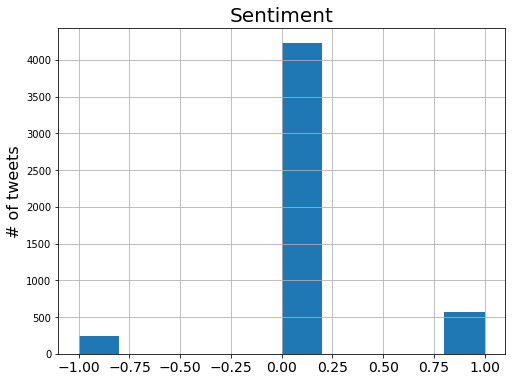

In [19]:
plt.figure(figsize=(8,6))
df_clean.Sentiment.hist(xlabelsize=14)
plt.title('Sentiment', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)
plt.show()

The labels are highly imbalanced whether the data is taken as a binary classification problem with Positive vs. Negative emotions or taken as a multiclass classification problem with all three labels.

## How long are the tweets?

In [20]:
df_clean['tweet_len'] = df_clean.pretweet.apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


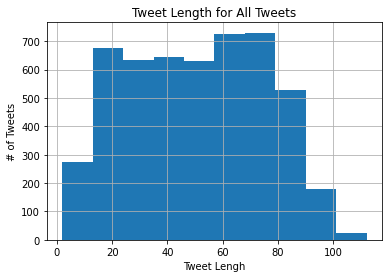

In [21]:
df_clean.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

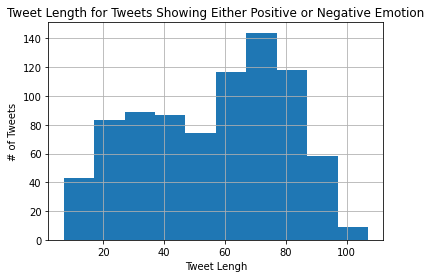

In [22]:
df_clean[df_clean.Sentiment != 0].tweet_len.hist()
plt.title('Tweet Length for Tweets Showing Either Positive or Negative Emotion')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [23]:
df_clean.tweet_len.max()

112

In [24]:
pd.set_option('display.max_colwidth', None)

In [25]:
df_clean[df_clean.tweet_len > 100].head()

,tweet,location,pretweet,Sentiment,tweet_len
38,"@NAkufoAddo The only old man in our political scene who thinks about this stomach, families and friends. U r the Nebucatnezzeh of our time","Kumasi, Ghana",the onli old man our polit scene who think about thi stomach famili and friend the nebucatnezzeh our time,0.0,105
121,@NAkufoAddo We extend our deepest condolences to those who lost their loved ones and pray a speedy recovery for the wounded persons.,NaN,extend our deepest condol those who lost their love one and pray speedi recoveri for the wound person,0.0,101
374,"My Ghanass Chemistry teacher and current headmaster speaks passionately about free shs, you could feel and see whatÃ¢â¬Â¦ https://t.co/ElmBJ8Mir9",Universe,ghanass chemistri teacher and current headmast speak passion about free sh you could feel and see what,0.0,102
379,WOW. Black West Africa Is Not a Priority!!! Did the African leaders &amp; people hear that. Black West Africa wake up.Ã¢â¬Â¦ https://t.co/Oe1NvSz5Aw,NaN,wow black west africa not prioriti did the african leader amp peopl hear that black west africa wake up,0.0,103
435,"For protection, vote for the umbrella party which will truly cover us not an elephantiasis gov't like NPP, Nana AddÃ¢â¬Â¦ https://t.co/eUD6jNxEer",NaN,for protect vote for the umbrella parti which will truli cover not elephantiasi govt like npp nana add,0.0,102
